In [1]:
import os
import numpy as np
import pandas as pd

from Functions.sp500.sp500 import get_sp500_tickers

In [2]:
def load_data(tickers, dev_split = False):
    final_X, final_y = None, None
    for ticker in tickers:
        print(f"Loading {ticker}")
        a = f"../Functions/csv_files/sampling_data_2/{ticker}/X.npy"
        b = f"../Functions/csv_files/sampling_data/{ticker}/y.npy"
        if not os.path.exists(a) or not os.path.exists(b):
            print(f"No {ticker} data")
            continue
        data_X = np.load(a, allow_pickle=True)
        data_y = np.load(b, allow_pickle=True)
        if len(data_X.shape) != 3 or data_X.shape[1] != 14 or data_X.shape[2] != 13:
            print(f"{ticker} is corrupted: Training Data is incorrect")
            continue
        if len(data_y.shape) != 1 or data_y.shape[0] != data_X.shape[0]:
            print(f"{ticker} is corrupted: Label is incorrect")
            continue
        if final_X is None and final_y is None:
            final_X = data_X
            final_y = data_y
        else:
            final_X = np.append(final_X, data_X, axis=0)
            final_y = np.append(final_y, data_y, axis=0)
    if dev_split:
        n = len(final_X)
        train = int(n * 0.9)
        dev = n - train
        return final_X[:train], final_y[:train], final_X[-dev:], final_y[-dev:]
    return final_X, final_y, None, None

In [3]:
tickers = get_sp500_tickers(False)
end = tickers.index("WTW.US")
tickers = tickers[:end]
print(tickers)

['AAPL.US', 'MSFT.US', 'AMZN.US', 'TSLA.US', 'GOOGL.US', 'GOOG.US', 'BRKB.US', 'UNH.US', 'JNJ.US', 'XOM.US', 'META.US', 'JPM.US', 'NVDA.US', 'PG.US', 'V.US', 'HD.US', 'CVX.US', 'LLY.US', 'PFE.US', 'MA.US', 'ABBV.US', 'PEP.US', 'MRK.US', 'KO.US', 'BAC.US', 'COST.US', 'TMO.US', 'WMT.US', 'AVGO.US', 'DIS.US', 'MCD.US', 'ABT.US', 'DHR.US', 'CSCO.US', 'ACN.US', 'VZ.US', 'NEE.US', 'WFC.US', 'BMY.US', 'CRM.US', 'TXN.US', 'LIN.US', 'COP.US', 'CMCSA.US', 'ADBE.US', 'PM.US', 'QCOM.US', 'CVS.US', 'UNP.US', 'RTX.US', 'AMGN.US', 'LOW.US', 'UPS.US', 'HON.US', 'SCHW.US', 'T.US', 'ELV.US', 'INTU.US', 'IBM.US', 'MDT.US', 'INTC.US', 'MS.US', 'NKE.US', 'NFLX.US', 'SPGI.US', 'AMD.US', 'GS.US', 'AMT.US', 'PYPL.US', 'SBUX.US', 'ADP.US', 'DE.US', 'ORCL.US', 'LMT.US', 'CAT.US', 'CI.US', 'BLK.US', 'AXP.US', 'TMUS.US', 'C.US', 'GILD.US', 'NOW.US', 'CB.US', 'PLD.US', 'MDLZ.US', 'MMC.US', 'VRTX.US', 'REGN.US', 'ADI.US', 'TJX.US', 'MO.US', 'SO.US', 'DUK.US', 'AMAT.US', 'ZTS.US', 'TGT.US', 'NOC.US', 'SYK.US', 'PGR.

In [4]:
X, y, X_dev, y_dev = load_data(tickers, False)

Loading AAPL.US
Loading MSFT.US
Loading AMZN.US
Loading TSLA.US
Loading GOOGL.US
Loading GOOG.US
Loading BRKB.US
Loading UNH.US
Loading JNJ.US
Loading XOM.US
Loading META.US
Loading JPM.US
Loading NVDA.US
Loading PG.US
Loading V.US
Loading HD.US
Loading CVX.US
Loading LLY.US
Loading PFE.US
Loading MA.US
Loading ABBV.US
Loading PEP.US
Loading MRK.US
Loading KO.US
Loading BAC.US
Loading COST.US
Loading TMO.US
Loading WMT.US
Loading AVGO.US
Loading DIS.US
Loading MCD.US
Loading ABT.US
Loading DHR.US
Loading CSCO.US
Loading ACN.US
Loading VZ.US
Loading NEE.US
Loading WFC.US
Loading BMY.US
Loading CRM.US
Loading TXN.US
Loading LIN.US
Loading COP.US
Loading CMCSA.US
Loading ADBE.US
Loading PM.US
Loading QCOM.US
Loading CVS.US
Loading UNP.US
Loading RTX.US
Loading AMGN.US
Loading LOW.US
Loading UPS.US
Loading HON.US
Loading SCHW.US
Loading T.US
Loading ELV.US
Loading INTU.US
Loading IBM.US
Loading MDT.US
Loading INTC.US
Loading MS.US
Loading NKE.US
Loading NFLX.US
Loading SPGI.US
Loading AMD.

<h1>Data Cleaning</h1>

In [5]:
COLUMNS = ['14-date', 'adjusted_close', 'volume', '14-wma', '14-slope', '14-rsi', '14-volatility', '26-date', '26-wma', '26-slope', '26-rsi', '26-dmi', '26-sar']

COLUMNS_NO_DATE = ['adjusted_close', 'volume', '14-wma', '14-slope', '14-rsi', '14-volatility', '26-wma', '26-slope', '26-rsi', '26-dmi', '26-sar']

In [6]:
def display_sample(X, no_date = True):
    data = pd.DataFrame(X)
    if no_date:
        data.columns = COLUMNS_NO_DATE
    else:
        data.columns = COLUMNS
    return data

In [7]:
display_sample(X[4400], False)

,14-date,adjusted_close,volume,14-wma,14-slope,14-rsi,14-volatility,26-date,26-wma,26-slope,26-rsi,26-dmi,26-sar
0,2022-03-21,137.4417,1285102,133.4161,0.2819,58.2365,11.59,2022-03-21,132.2727,0.0602,51.7139,7.4397,127.1499
1,2022-03-22,138.5859,1977714,134.1868,0.4366,59.507,13.7798,2022-03-22,132.7437,0.1541,52.5773,8.257,127.6555
2,2022-03-23,133.5017,1337390,134.2216,0.5507,51.9453,12.9916,2022-03-23,132.8327,0.1849,48.5639,1.0608,128.4081
3,2022-03-24,135.7205,1346742,134.5805,0.6337,54.6535,13.4748,2022-03-24,133.0887,0.2418,50.2862,1.0608,129.1156
4,2022-03-25,135.024,1403732,134.8227,0.5693,53.6317,12.6766,2022-03-25,133.2918,0.2854,49.7424,1.3009,129.7807
5,2022-03-28,134.7355,1568085,134.9756,0.4398,53.1881,10.8515,2022-03-28,133.4719,0.2812,49.5118,1.3009,130.4058
6,2022-03-29,137.7203,1608646,135.4686,0.4981,57.1378,11.5463,2022-03-29,133.8582,0.3155,51.911,5.8615,130.9934
7,2022-03-30,134.7753,1439798,135.5201,0.4848,52.4368,11.5115,2022-03-30,134.0086,0.306,49.4974,0.3609,131.5458
8,2022-03-31,131.6611,3046440,135.1456,0.2457,47.9446,10.396,2022-03-31,133.9147,0.2254,47.0896,5.1666,132.065
9,2022-04-01,133.2928,1466879,134.9695,-0.0452,50.3449,6.1033,2022-04-01,133.9235,0.1741,48.4559,6.0751,140.1997


In [8]:
def remove_date(dataset):
    dataset = np.delete(dataset, 7, 2)
    dataset = np.delete(dataset, 0, 2)
    dataset = np.asarray(dataset).astype(np.float32)
    return dataset

In [9]:
def split_14_to_7(dataset, label):
    dataset = remove_date(dataset)
    print("Original Shape:", dataset.shape)
    lst = []
    labels = []
    for index, x in enumerate(dataset):
        if not np.isnan(x[:7]).any():
            lst.append(x[:7])
            labels.append(x[8, 0])
        if not np.isnan(x[7:14]).any():
            lst.append(x[7:14])
            labels.append(y[index])
    lst = np.array(lst)
    print("New Shape", lst.shape)
    return lst, labels

In [10]:
train_X, labels = split_14_to_7(X, y)

Original Shape: (6675, 14, 11)
New Shape (13313, 7, 11)


In [11]:
np.isnan(train_X).any()

False

<h1>Data Transformation</h1>

In [12]:
def transform_output(X_train, y):
    y_out = []
    final_price = X_train[:, -1, 0]
    for i in range(len(final_price)):
        if y[i] >= final_price[i]:
            y_out.append(1)
        elif y[i] < final_price[i]:
            y_out.append(0)
        # else:
        #     y_out.append(1)
        print(y[i], final_price[i], y_out[-1])
    return np.array(y_out)

In [13]:
y_class = transform_output(train_X, labels)

35.946 36.6364 0
36.2122 36.2594 0
0.4156 0.4061 1
0.4317 0.4266 1
0.3399 0.3512 0
0.3106 0.341 0
7.4223 7.5029 0
7.6299 8.0003 0
2.2561 2.3616 0
2.1847 2.2932 0
32.0715 32.1771 0
32.7427 32.8037 0
24.4171 24.8263 0
22.0467 23.4776 0
4.9957 5.1677 0
5.3152 5.2157 1
0.3443 0.3297 1
0.3161 0.3261 0
21.9284 22.1477 0
22.7788 22.5707 1
0.3106 0.3281 0
0.2941 0.2978 0
171.1487 174.0519 0
166.436 164.3382 1
64.3791 65.3355 0
64.6163 65.5165 0
2.825 2.835 0
2.8153 2.8474 0
23.5217 23.4591 1
24.3609 24.4818 0
40.1439 41.3049 0
41.3334 41.5399 0
48.5668 49.4454 0
48.5789 49.0968 0
53.6264 53.0875 1
55.375 53.8532 1
155.6684 161.942 0
156.604 165.064 0
94.7303 96.1047 0
91.7063 91.0794 1
96.7267 94.9221 1
93.4642 93.238 1
25.0072 25.3048 0
25.0375 24.812 1
130.4781 128.3496 1
133.4384 132.082 1
146.9347 145.1202 1
150.5439 147.3412 1
138.3329 138.6316 0
144.8647 144.2474 1
114.6737 113.4711 1
115.7705 114.7603 1
7.678 7.5997 1
8.9886 8.9299 1
21.1726 20.814 1
20.7994 21.1726 0
16.0657 17.3239 0


In [14]:
#shuffle data
from sklearn.utils import shuffle
train_X, y_class = shuffle(train_X, y_class)

In [15]:
print(train_X.shape)
print(y_class.shape)

(13313, 7, 11)
(13313,)


<h1>Model Building</h1>

In [16]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization, GRU, Conv2D, MaxPool2D, Flatten, Input

In [17]:
print(list(y_class).count(0))
print(list(y_class).count(1))
print("1 Percentage = ", list(y_class).count(1)/len(list(y_class)))

6248
7065
1 Percentage =  0.5306842935476602


<h1>Data Transformation</h1>

In [18]:
from lstm_utils import scale_column, rsi_transformer, dmi_transformer, plot_history
def pipeline(X):
    array = []
    for x in X:
        x = scale_column(x, 0)
        x = scale_column(x, 1)
        x = scale_column(x, 2)
        x = scale_column(x, 6)
        x = rsi_transformer(x, 4)
        x = rsi_transformer(x, 8)
        x = dmi_transformer(x)
        array.append(x)
    return np.array(array)

In [19]:
train_X_final = pipeline(train_X)

<h1>Control Model</h1>

This control model accepts historical prices as the only feature only. It will be used to create a benchmark for future models.

In [20]:
train_X_control = train_X_final[:,:,0]
print(train_X_control.shape)

(13313, 7)


In [22]:
control_model = Sequential()
control_model.add(LSTM(6, activation='relu', dropout=0.7, input_shape=(7, 1)))
control_model.add(Dense(8, activation='relu'))
control_model.add(Dense(4, activation='relu'))
control_model.add(Dense(2, activation='sigmoid'))
control_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

control_history = control_model.fit(train_X_control, y_class, epochs=20, validation_split=0.2, verbose=1, batch_size=1)

Epoch 1/20
10650/10650 [==============================] - 34s 3ms/step - loss: 0.6923 - acc: 0.5267 - val_loss: 0.6912 - val_acc: 0.5441
Epoch 2/20
10650/10650 [==============================] - 35s 3ms/step - loss: 0.6921 - acc: 0.5273 - val_loss: 0.6897 - val_acc: 0.5441
Epoch 3/20
10650/10650 [==============================] - 32s 3ms/step - loss: 0.6919 - acc: 0.5273 - val_loss: 0.6904 - val_acc: 0.5441
Epoch 4/20
10650/10650 [==============================] - 32s 3ms/step - loss: 0.6919 - acc: 0.5273 - val_loss: 0.6892 - val_acc: 0.5441
Epoch 5/20
10650/10650 [==============================] - 36s 3ms/step - loss: 0.6919 - acc: 0.5265 - val_loss: 0.6894 - val_acc: 0.5441
Epoch 6/20
10650/10650 [==============================] - 36s 3ms/step - loss: 0.6920 - acc: 0.5273 - val_loss: 0.6897 - val_acc: 0.5441
Epoch 7/20
10650/10650 [==============================] - 36s 3ms/step - loss: 0.6920 - acc: 0.5273 - val_loss: 0.6900 - val_acc: 0.5441
Epoch 8/20
10650/10650 [=================

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


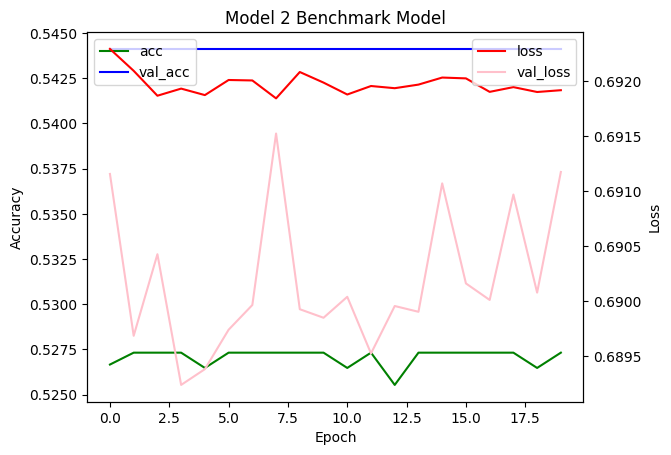

In [23]:
plot_history(control_history, "Model 2 Benchmark Model")

Model #1

In [29]:
NUM_OF_TIMESTEPS = 7
NUM_OF_FEATURES = 11

model = Sequential()
model.add(LSTM(6, activation='relu', dropout=0.7, input_shape=(NUM_OF_TIMESTEPS, NUM_OF_FEATURES)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 6)                 432       
                                                                 
 dense_11 (Dense)            (None, 8)                 56        
                                                                 
 dense_12 (Dense)            (None, 4)                 36        
                                                                 
 dense_13 (Dense)            (None, 2)                 10        
                                                                 
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(train_X_final, y_class, epochs=20, verbose=1, batch_size=1, validation_split=0.2)

Epoch 1/20
10650/10650 [==============================] - 34s 3ms/step - loss: 0.9869 - acc: 0.5162 - val_loss: 0.7021 - val_acc: 0.5441
Epoch 2/20
10650/10650 [==============================] - 32s 3ms/step - loss: 0.6973 - acc: 0.5275 - val_loss: 0.6900 - val_acc: 0.5441
Epoch 3/20
10650/10650 [==============================] - 33s 3ms/step - loss: 0.6936 - acc: 0.5269 - val_loss: 0.6896 - val_acc: 0.5441
Epoch 4/20
10650/10650 [==============================] - 32s 3ms/step - loss: 0.6940 - acc: 0.5265 - val_loss: 0.6897 - val_acc: 0.5441
Epoch 5/20
10650/10650 [==============================] - 35s 3ms/step - loss: 0.6916 - acc: 0.5240 - val_loss: 0.6915 - val_acc: 0.5441
Epoch 6/20
10650/10650 [==============================] - 33s 3ms/step - loss: 0.6920 - acc: 0.5273 - val_loss: 0.6892 - val_acc: 0.5441
Epoch 7/20
10650/10650 [==============================] - 33s 3ms/step - loss: 0.6920 - acc: 0.5273 - val_loss: 0.6911 - val_acc: 0.5441
Epoch 8/20
10650/10650 [=================

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


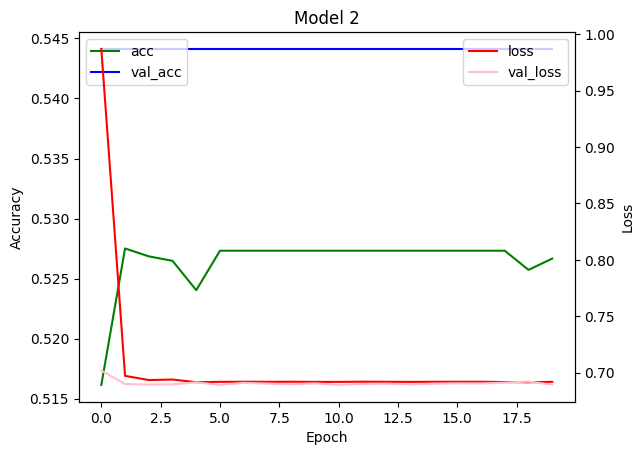

In [31]:
plot_history(history, "Model 2")

In [361]:
# model = Sequential()
# model.add(Input((NUM_OF_TIMESTEPS, NUM_OF_FEATURES, 0)))
# model.add(Conv1D(filters = 8, kernel_size=(1, NUM_OF_FEATURES),activation="relu"))
# model.add(Conv1D(filters = 8, kernel_size=(1, NUM_OF_FEATURES), activation="relu"))
# model.add(MaxPool1D(pool_size=(2, 1)))
# model.add(Conv1D(filters = 8, kernel_size=(3,1), activation="relu"))
# model.add(MaxPool1D(pool_size=(2,1)))
# model.add(Flatten())
# model.add(Dropout(-1.1))
# model.add(Dense(1, activation="sigmoid"))
# model.summary()

ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d_38. Consider increasing the input size. Received input shape [None, 14, 1, 8] which would produce output shape with a zero or negative value in a dimension.